<a href="https://colab.research.google.com/github/panghanwu/scikit-learning_Elwing/blob/main/multilayer_perceptron_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from tensorflow.keras.datasets.mnist import load_data
# ((training picture, training answer), (testing picture, testing answer))
(x_train, y_train), (x_test, y_test) = load_data()

In [16]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,24,92,92,92,92,198,92,77,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,4,108,201,254,254,254,254,254,254,243,97,3,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,120,254,254,254,254,254,254,254,254,254,254,102,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,5,114,246,254,254,254,254,254,254,251,146,196,254,197,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,34,254,254,254,254,254,214,215,254,149,0,22,195,225,52,0,0,0,0,0


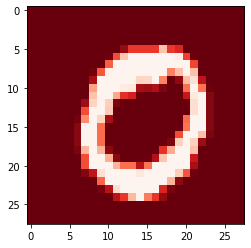

In [17]:
import matplotlib.pyplot as plt
import random
import pandas as pd

idx = random.randint(0, 59999)
plt.imshow(x_train[idx], cmap='Reds_r')
pd.DataFrame(x_train[idx])

### Sequential僅能按照順序疊層，有其侷限性。  
  
### 神經元數量、層數、激活函數入門選擇參考：
- 簡單問題用少量神經元、少層數即可。
- 反之，複雜問題使用多神經元、多層數。
- 一般來說神經元數量隨層數遞減，習慣上使用256、128、64等二進位整數。
- 中間層激活函數（activation fuction）必定使用ReLU類，避免梯度消失。
- 最後一層的激活函數在分類問題，二元或不互斥的答案用使用Sigmoid、互斥則用Softmax。

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

layers = [
          # 784*128+128 = 100480
          Dense(128, activation='relu', input_dim=784),
          # 128*10+10 = 1290
          Dense(10, activation='softmax')
]
model = Sequential(layers)
model.summary()
# 掌握Param# 即掌握model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Normalization
依照函式庫需求，根據各函式庫訓練權重的隨機起始值。
    
Tensorflow: [0,1] or [-1,1]  
Caffe: [0,255]

In [19]:
from tensorflow.keras.utils import to_categorical
# (60000,128,128) to (60000,784)
x_train_norm = x_train.reshape(-1, 784)/255.
x_test_norm = x_test.reshape(-1, 784)/255.
# one-hot encoding
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(y_train[0], y_train_cat[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [20]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
# 一個神經元: binary crossentropy p*log(1/q) + (1-p)*log(1/(1-q))
# 多個神經元: categorical crossentropy p1*log(1/q1) + p2*log(1/q2)...
model.compile(loss=CategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=['accuracy'])

# batch: 100-200(小圖片), 10-20(大圖片)
# epoch: 整份資料訓練的次數
# 60000筆資料: 2 epochs, 200 batches -> 60000*2/200次梯度調整
model.fit(x_train_norm,
     y_train_cat,
     batch_size=100,
     epochs=1,
     validation_split=0.1)
# 訓練至val_loss最小值時 應避免過度訓練

540/540 [==============================] - 2s 3ms/step - loss: 0.3574 - accuracy: 0.9017 - val_loss: 0.1577 - val_accuracy: 0.9593


In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 使用callback函式
callbacks = [
        ModelCheckpoint('model.h5', save_best_only=True),
        EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(x_train_norm,
     y_train_cat,
     batch_size=200,
     epochs=50,
     callbacks=callbacks,
     validation_split=0.1)

Epoch 1/50
270/270 [==============================] - 2s 6ms/step - loss: 0.1739 - accuracy: 0.9506 - val_loss: 0.1316 - val_accuracy: 0.9623
Epoch 2/50
270/270 [==============================] - 2s 7ms/step - loss: 0.1399 - accuracy: 0.9606 - val_loss: 0.1112 - val_accuracy: 0.9697
Epoch 3/50
270/270 [==============================] - 2s 8ms/step - loss: 0.1159 - accuracy: 0.9676 - val_loss: 0.0987 - val_accuracy: 0.9715
Epoch 4/50
270/270 [==============================] - 2s 8ms/step - loss: 0.0973 - accuracy: 0.9726 - val_loss: 0.0937 - val_accuracy: 0.9730
Epoch 5/50
270/270 [==============================] - 2s 7ms/step - loss: 0.0836 - accuracy: 0.9767 - val_loss: 0.0851 - val_accuracy: 0.9762
Epoch 6/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0719 - accuracy: 0.9802 - val_loss: 0.0816 - val_accuracy: 0.9762
Epoch 7/50
270/270 [==============================] - 1s 5ms/step - loss: 0.0622 - accuracy: 0.9824 - val_loss: 0.0794 - val_accuracy: 0.9780
Epoch 

In [22]:
model.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9776


[0.07000180333852768, 0.9775999784469604]

In [23]:
from tensorflow.keras.models import load_model
# 手動儲存: model.save('model.h5')
"""
if not os.path.exists('model.h5):
  newmodel
  compile
else:
  load_model('model.h5)
"""
load = load_model('model.h5')
# 不用再compile 可接續fit
# 因此Colab雖然會斷線 但可以隨時儲存隨時繼續訓練
load.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9776


[0.07000180333852768, 0.9775999784469604]

In [24]:
# format
'{}={}'.format('y','x')

'y=x'

In [25]:
from sklearn.metrics import confusion_matrix

pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(原本)".format(n) for n in range(10)],
       columns=["{}(預測)".format(n) for n in range(10)])

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),967,0,2,1,1,2,3,2,2,0
1(原本),0,1129,2,1,0,0,1,0,2,0
2(原本),2,1,1012,2,2,0,2,6,4,1
3(原本),0,0,6,992,0,2,0,5,2,3
4(原本),2,0,0,0,962,1,4,1,1,11
5(原本),2,1,0,14,1,867,4,0,2,1
6(原本),5,2,1,1,5,7,935,1,1,0
7(原本),0,4,8,4,1,0,0,1004,3,4
8(原本),3,1,3,11,6,3,1,4,940,2
9(原本),3,5,0,7,14,2,0,8,2,968


In [26]:
pre != y_test

array([False, False, False, ..., False, False, False])

In [34]:
import numpy as np

a = np.array([[0,1,1],
        [0,2,0]])
np.nonzero(a)

(array([0, 0, 1]), array([1, 2, 1]))

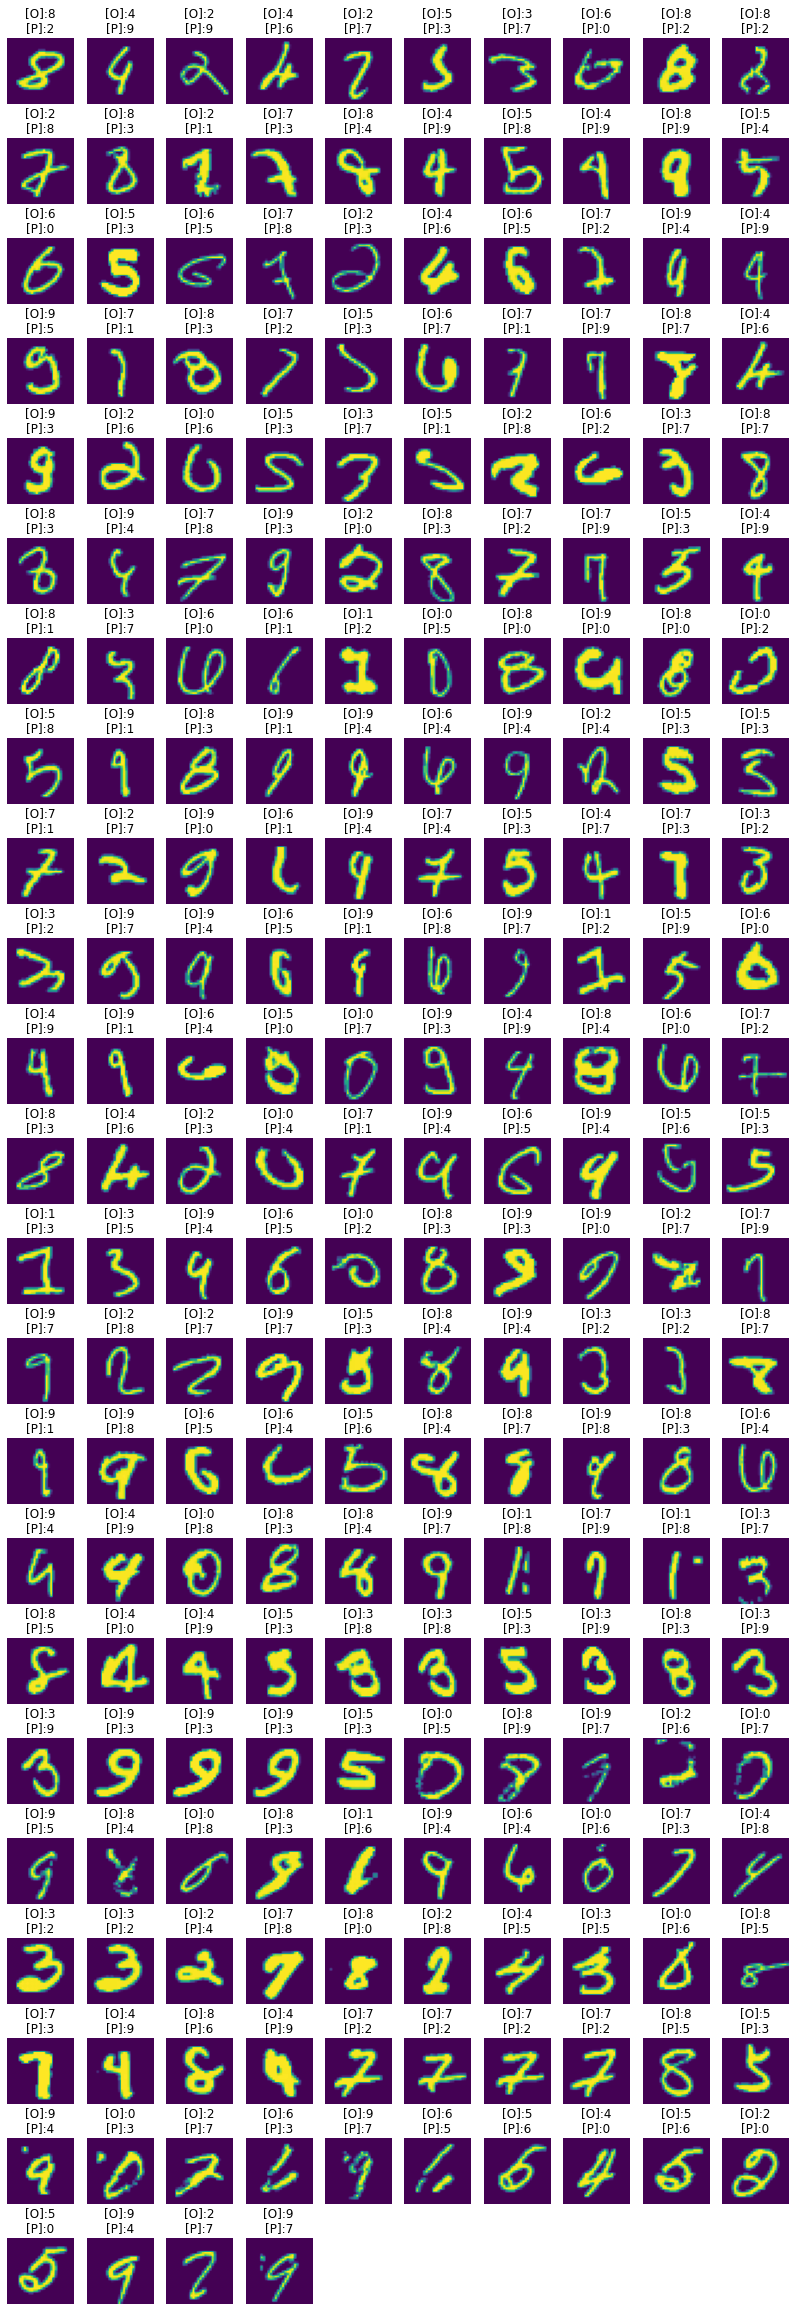

In [33]:
idx = np.nonzero(pre != y_test)[0]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14,42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
  plt.subplot(height, width, i+1)
  title = '[O]:{}\n[P]:{}'.format(false_label[i], false_pre[i])
  plt.title(title)
  plt.axis('off')
  plt.imshow(false_img[i])


0 的機率為 0.0
1 的機率為 0.0
2 的機率為 0.002
3 的機率為 0.671
4 的機率為 0.0
5 的機率為 0.16
6 的機率為 0.0
7 的機率為 0.0
8 的機率為 0.166
9 的機率為 0.002


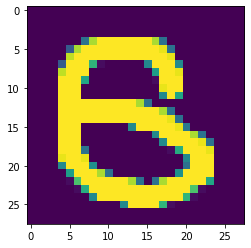

In [42]:
# pip install pillow
import PIL
# need test image file
fn = 'test2.png'
img = PIL.Image.open(fn).convert('L').resize((28,28))
img_np = np.array(img)
test = img_np.reshape(1,784) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
  print(i, '的機率為', round(p,3))
plt.imshow(img_np)